In [5]:
# Python3
import numpy as np
import csv
import matplotlib.pylab as plt
import sys
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.special import expit



In [6]:
# constants:
test_using_sklearn = True


def read_file(filename):
    data = []
    with open('/Users/wenbo/Documents/TopicML/hw2/hw2-data/%s' % filename) as file:
        content = csv.reader(file)
        for c in content:
            data.append(c)
    return np.matrix(data).astype(np.float32)




In [7]:
X_train = read_file('X_train.csv')
X_test = read_file('X_test.csv')
Y_train = read_file('y_train.csv')
Y_test = read_file('y_test.csv')
# predict_test = naive_bayes(X_train, Y_train, X_test, Y_test)
# print(predict_test)
print(X_train[0])

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    0.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00   1.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00   0.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   5.00000000e+00   1.01000000e+02
    1.02800000e+03]]

weights1
[  3.53603601e-01   3.41779292e-01   6.13175690e-01   2.13963967e-02
   6.23310804e-01   3.76126140e-01   4.19481993e-01   3.44031543e-01
   3.07995498e-01   4.58333343e-01   3.13626140e-01   6.29504502e-01
   2.87162155e-01   1.27815321e-01   1.60472974e-01   5.45045018e-01
   3.83445948e-01   3.81193697e-01   8.86261284e-01   2.10022524e-01
   8.06306303e-01   5.29279262e-02   3.34459454e-01   3.76689196e-01
   2.75900904e-02   1.46396393e-02   3.94144142e-03   1.68918911e-02
   6.75675692e-03   9.57207195e-03   1.68918923e-03   1.12612615e-03
   3.43468450e-02   5.63063053e-03   2.53378376e-02   6.25000000e-02
   5.57432435e-02   1.80180185e-02   3.32207195e-02   1.12049550e-01
   5.63063077e-04   1.12612611e-02   4.78603616e-02   2.59009004e-02
   2.69707203e-01   3.82882878e-02   1.01351347e-02   9.00900923e-03
   1.51463971e-01   6.53153181e-01   7.20720738e-02   8.33333313e-01
   6.14864886e-01   2.86599100e-01   7.33117163e-01   2.71287411e-01
   1.85924992e-01]
[[1]
 

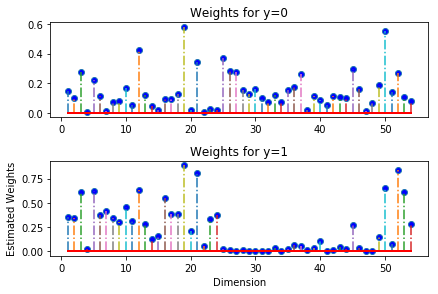

In [8]:
# def naive_bayes(X_train, Y_train, X_test, Y_test):
    # get ratio of 1s:
pi = np.mean(Y_train)
    # print(pi)

X_train2 = X_train.copy()
X_train2[:, -3:] = np.apply_along_axis(np.log, 0, X_train2[:, -3:])
    # print(X_train2[(0,1,2),-3:])
    # print(np.apply_along_axis(np.log,0,X_train2[(0,1,2),-3:]))
    # print(np.apply_along_axis(np.mean,0,X_train2).shape)

zero_vals = np.array([x == 0 for x in Y_train.reshape(1, -1).tolist()[0]])

weights = [np.apply_along_axis(np.mean, 0,
                                   X_train2[zero_vals,]),
               np.apply_along_axis(np.mean, 0,
                                   X_train2[np.invert(zero_vals),])
               ]
    # invert the last 3 weights because MLE is inverse
weights[0][-3:] = 1 / weights[0][-3:]
weights[1][-3:] = 1 / weights[1][-3:]
print("weights1")
print(weights[1])
def predict_bern(row, coef, pi):
        # initialize to class priors
    result = [1 - pi, pi]
    row = [item for sublist in row.flatten().tolist() for item in sublist]
    for j in range(2):
            # mutliply weights by row for bern
            # print(row.flatten())

            # print(j)
            # print(row)
            tr_bern = [(coef[j][i] ** row[i]) * ((1 - coef[j][i]) ** (1 - row[i]))
                       for i in range(54)]
            # mutliply weights by row for pareto
            tr_pareto = [coef[j][i] * (row[i] ** (-coef[j][i] - 1))
                         for i in range(54, 57)]
            result[j] *= np.prod(tr_bern) * np.prod(tr_pareto)
    return np.argmax(result)
# print(predict_bern(X_test[0], mu,))

def crosstab(list1, list2):
        # print(list1.shape)
        # print(list2.shape)
    print('predict\tactual\tnum')
    for l in [0.0, 1.0]:
        for m in [0.0, 1.0]:
            print('%d\t%d\t%d' % (l, m,
                                      sum([(list1[0, i] == l) & (list2[0, i] == m) for i in range(list1.shape[1])]
                                          )))

    # results for train:
    # predict_train = np.apply_along_axis(predict_bern,1,X_train,coef=weights,pi=pi).flatten().reshape(-1,1)
    # acc_train = sum(predict_train==Y_train)/len(Y_train)
    # print('train accuracy: %f'%acc_train)
    # print('train crosstab:')
    # crosstab(predict_train.reshape(1,-1),
    #          Y_train.reshape(1,-1))


    # results for test:
predict_test = np.apply_along_axis(predict_bern, 1, X_test, coef=weights, pi=pi).flatten().reshape(-1, 1)
print(predict_test)
acc_test = sum(predict_test == Y_test) / len(Y_test)
print('\ntest accuracy: %f' % acc_test)
print('test crosstab:')
crosstab(predict_test.reshape(1, -1),
             Y_test.reshape(1, -1))

    # stem plot:
fig, ax = plt.subplots(2, 1)
ax1, ax2 = ax.ravel()
markerline, stemlines, baseline = ax1.stem(range(1, 55), weights[0][:54], '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
ax1.set_title('Weights for y=0')

markerline, stemlines, baseline = ax2.stem(range(1, 55), weights[1][:54], '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
ax2.set_title('Weights for y=1')

plt.tight_layout()
plt.xlabel('Dimension')
plt.ylabel('Estimated Weights')
plt.savefig('/Users/wenbo/Documents/TopicML/hw2/hw2_naive_bayes.png')
plt.show()




In [5]:
y = [3,1]
print(np.argmax(y))

0


In [3]:
import math
import numpy as np
import csv
#print(X_train)
#print(Y_train)

def read_file(filename):
    data = []
    with open('/Users/wenbo/Documents/TopicML/hw2/hw2-data/%s' % filename) as file:
        content = csv.reader(file)
        for c in content:
            data.append(c)
    return np.matrix(data).astype(np.float32)


X_train = read_file('X_train.csv')
X_test = read_file('X_test.csv')
Y_train = read_file('y_train.csv')
Y_test = read_file('y_test.csv')
x = X_test[0]
# print(X_train)
#print(x)

mu = np.zeros((2,57))
# sigma = np.zeros((2))
# print(np.shape(mu))
n = np.array([0,0])
# print(np.shape(X_train)[1])
# print(np.shape(X_train))
# print(np.shape(mu))
# X_train2 = np.zeros((4508,57))
X_train2 = X_train.copy()
# print("X_train")
# print(X_train[0])
# print(np.shape(X_train2[0]))
# print(np.shape(X_train2))
# print(np.shape(X_train))
# for i in range(np.shape(X_train)[0]):
#     for j in range(54,57):
#         X_train2[1][5] = np.log(1)
#print(X_train2)
# print(X_train2)
X_train2[:, -3:] = np.apply_along_axis(np.log, 0, X_train2[:, -3:])
# print("X_train2")
# print(X_train2)
# print(X_train2[0])
for i in range(np.shape(X_train)[0]):
    if Y_train[i] == 0:
        n[0] = n[0] + 1
        mu[0] = mu[0] + X_train2[i]
    elif Y_train[i] == 1:
        n[1] = n[1] + 1
        mu[1] = mu[1] + X_train2[i]
mu[0] = mu[0]/n[0]
mu[1] = mu[1]/n[1]

mu[0][-3:] = 1 / mu[0][-3:]
mu[1][-3:] = 1 / mu[1][-3:]
# print("mu1")
# #print(n[0])
# print(mu[1])

def fx(row, coef):
    
        # initialize to class priors
    pi = np.mean(Y_train)
    result = [1 - pi, pi]
    tr_bern = 1
    tr_pareto = 1
    row = [item for sublist in row.flatten().tolist() for item in sublist]
    for j in range(2):
            # mutliply weights by row for bern
            # print(row.flatten())

            # print(j)
            tr_bern = [(coef[j][i] ** row[i]) * ((1 - coef[j][i]) ** (1 - row[i]))
                       for i in range(54)]
            # mutliply weights by row for pareto
            tr_pareto = [coef[j][i] * (row[i] ** (-coef[j][i] - 1))
                         for i in range(54, 57)]
            result[j] *= np.prod(tr_bern) * np.prod(tr_pareto)
    return np.argmax(result),result
# print("mu")
# print(mu[0][0])
# print("weights")
# print(weights[0][0])
for i in range(93):
    print(fx(X_test[i], mu))
# print(fx(X_test[0],weights,pi))
#
# # print(mu[1])
# # for i in range(np.shape(X_train)[0]):
# #     if Y_train[i] == 0:
# #         sigma[0] = sigma[0] + (X_train[i] - mu[0])*np.transpose((X_train[i] - mu[0]))
# #     elif Y_train[i] == 1:
# #         sigma[1] = sigma[1] + (X_train[i] - mu[1])*np.transpose((X_train[i] - mu[1]))
# # sigma[0] = sigma[0]/n[0]
# # sigma[1] = sigma[1]/n[1]
# # print(sigma)
# p = np.mean(Y_train)
# pi = [1-p, p]
# print(pi)
# y = np.zeros(2)
# y[0] = pi[0] * abs(sigma[0])**(-1/2) * math.exp(-1/2 * (x-mu[0]) * sigma[0]**(-1) * np.transpose(x-mu[0]))
# y[1] = pi[1] * abs(sigma[1])**(-1/2) * math.exp(-1/2 * (x-mu[1]) * sigma[1]**(-1) *np.transpose(x-mu[1]))
# print(np.argmax(y))


mu1
[  3.53603604e-01   3.41779279e-01   6.13175676e-01   2.13963964e-02
   6.23310811e-01   3.76126126e-01   4.19481982e-01   3.44031532e-01
   3.07995495e-01   4.58333333e-01   3.13626126e-01   6.29504505e-01
   2.87162162e-01   1.27815315e-01   1.60472973e-01   5.45045045e-01
   3.83445946e-01   3.81193694e-01   8.86261261e-01   2.10022523e-01
   8.06306306e-01   5.29279279e-02   3.34459459e-01   3.76689189e-01
   2.75900901e-02   1.46396396e-02   3.94144144e-03   1.68918919e-02
   6.75675676e-03   9.57207207e-03   1.68918919e-03   1.12612613e-03
   3.43468468e-02   5.63063063e-03   2.53378378e-02   6.25000000e-02
   5.57432432e-02   1.80180180e-02   3.32207207e-02   1.12049550e-01
   5.63063063e-04   1.12612613e-02   4.78603604e-02   2.59009009e-02
   2.69707207e-01   3.82882883e-02   1.01351351e-02   9.00900901e-03
   1.51463964e-01   6.53153153e-01   7.20720721e-02   8.33333333e-01
   6.14864865e-01   2.86599099e-01   7.33117178e-01   2.71287430e-01
   1.85924991e-01]
(1, [1.9657

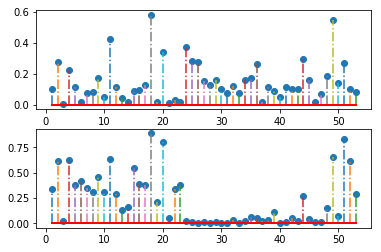

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = list(range(1,54))
#print(x)
plt.figure(1)
plt.subplot(211)
markerline, stemlines, baseline = plt.stem(x, mu[0][x], '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.subplot(212)
markerline, stemlines, baseline = plt.stem(x, mu[1][x], '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)

plt.show()



In [3]:
from operator import itemgetter
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def read_file(filename):
    data = []
    with open('/Users/wenbo/Documents/TopicML/hw2/hw2-data/%s' % filename) as file:
        content = csv.reader(file)
        for c in content:
            data.append(c)
    return np.matrix(data).astype(np.float32)


X_train = read_file('X_train.csv')
X_test = read_file('X_test.csv')
Y_train = read_file('y_train.csv')
Y_test = read_file('y_test.csv')
#K = 1
K = 1
length = {}
def cal_distance(X_train, x_test):
    for i in range(len(X_train)):
        length[i] = np.sum(np.abs(X_train[i]-x_test))
    return length

def predict(X_train, x_test):
    result = cal_distance(X_train,x_test)

    result2 = {}
    result2 = sorted(result.items(), key=itemgetter(1))

    n = [0,0]
    for i in range(K):
        if Y_train[result2[i][0]] == 0:
            n[0] = n[0] + 1
        elif Y_train[result2[i][0]] == 1:
            n[1] = n[1] + 1
    
    if n[0] > n[1]:
        num = 0
    elif n[1] > n[0]:
        num = 1
    else:
        num = np.random.randint(2)
    return num

#a,n = predict(X_train, X_test[0])
    
res = np.zeros((20, len(Y_test)))

for k in range(20):
    K = k + 1
    for i in range(len(Y_test)):
        res[k][i] = predict(X_train, X_test[i])

print(res)
    
# print(a)
# print(n)

[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 1.  1.  0. ...,  0.  0.  0.]
 [ 1.  1.  0. ...,  0.  0.  0.]
 [ 1.  1.  0. ...,  0.  0.  0.]]


[0.8924731182795699, 0.8387096774193549, 0.8602150537634409, 0.8602150537634409, 0.8817204301075269, 0.8602150537634409, 0.8602150537634409, 0.8387096774193549, 0.9032258064516129, 0.8709677419354839, 0.8494623655913979, 0.8709677419354839, 0.8817204301075269, 0.8709677419354839, 0.8602150537634409, 0.8602150537634409, 0.8494623655913979, 0.8494623655913979, 0.8602150537634409, 0.8709677419354839]


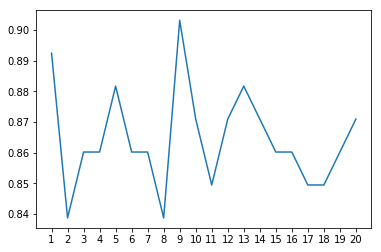

In [5]:


accuracy = []

for k in range(20):
    acc = 0
    for i in range(len(Y_test)):
        if res[k][i] == Y_test[i]:
            acc = acc + 1
    accuracy.append(acc/93)
print(accuracy)


x = list(range(1,21))
#print(x)
plt.figure(1)
# markerline, stemlines, baseline = plt.stem(x, accuracy[x], '-.')
plt.plot(x, accuracy)
plt.xticks(x)

plt.show()

In [30]:
from scipy.special import expit
X_train = read_file('X_train.csv')
X_test = read_file('X_test.csv')
Y_train = read_file('y_train.csv')
Y_test = read_file('y_test.csv')

    
X_train2 = X_train.copy()
X_test2 = X_test.copy()
Y_train2 = Y_train.copy()
Y_test2 = Y_test.copy()

    # standardize data:  NOT ALLOWED!!
    # for i in range(54,57):
    #     xmean = np.mean(X_train2[:,i])
    #     xstd = np.std(X_train2[:,i])
    #     X_train2[:,i] = (X_train2[:,i]-xmean)/xstd
    #     X_test2[:,i] = (X_test2[:,i]-xmean)/xstd

    # Add a column of 1s to the data:
# X_train2 = np.column_stack((X_train2, np.ones(X_train2.shape[0])))
# X_test2 = np.column_stack((X_test2, np.ones(X_test2.shape[0])))

    # make 0 to -1:
Y_train2[Y_train2 == 0] = -1
Y_test2[Y_test2 == 0] = -1

    # initialize weights:
weights = np.zeros(X_train2.shape[1]).reshape(-1, 1)

    # define a sigmoit function:
def sigmoid(x):
    print(x)
    return 1 / (1 + np.exp(-x))


iterations = 10  # 00
objective = []
for t in range(1, iterations + 1):
        # print('t=%d'%t)
    eta = 1 / (1e5 * np.sqrt(t + 1))

    sigm_i = expit(np.multiply(Y_train2, X_train2.dot(weights)))
            # print(sigm_i.shape)

            # objective for previous iteration:
    objective.append(np.sum(np.log(sigm_i + 1e-10)))

            # determine the constant for each i
    update = X_train2.T.dot(np.multiply(Y_train2, 1 - sigm_i))
            # print(update.shape)

    weights += eta * update

            # print(weights[:10])

# x = list(range(1,10001))
# plt.plot(x, objective)
# plt.show()
# figtitle = 'Logistic Regression (Steepest Ascnet)'
# figsave = 'hw2_logreg.png'

    
print(np.shape(np.multiply(Y_train2, X_train2.dot(weights))))

# predict_test = np.sign(X_test2.dot(weights))
# accuracy = sum(predict_test == Y_test2) / len(predict_test)
# print("Test set accuracy:", accuracy)




(4508, 1)


[[ -6.20165261e-01]
 [ -1.65201410e-01]
 [ -4.85988288e-01]
 [  6.55938818e-01]
 [  1.11366873e+00]
 [  2.64030678e-01]
 [  2.49104641e+00]
 [  9.83290859e-01]
 [  2.63980341e-01]
 [  3.58212246e-01]
 [ -4.38731579e-01]
 [ -3.38749513e-01]
 [ -9.78818268e-01]
 [  8.51431848e-01]
 [  1.33077217e+00]
 [  1.56064667e+00]
 [  1.04856249e+00]
 [ -4.87441896e-01]
 [  1.81856420e-01]
 [  5.15383049e-01]
 [  6.65469056e-01]
 [  1.36577955e+00]
 [  9.54971315e-01]
 [  1.74688895e+00]
 [ -3.68833802e+00]
 [ -2.32568491e-01]
 [ -6.27929070e+00]
 [  2.19280611e+00]
 [ -6.37149350e-01]
 [ -3.74689569e-01]
 [ -2.23649835e+00]
 [ -1.57635101e+00]
 [ -7.86608882e-01]
 [  1.05287410e+00]
 [ -1.72303872e+00]
 [  4.67555079e-01]
 [ -1.08280283e+00]
 [  1.58779210e+00]
 [ -5.72211559e-01]
 [ -9.87794236e-02]
 [ -6.37164050e+00]
 [ -2.53319033e+00]
 [ -1.22863049e+00]
 [ -1.75718633e+00]
 [ -1.04212099e+00]
 [ -2.44935416e+00]
 [  2.76262946e-01]
 [ -2.27469441e+00]
 [ -2.58065441e-01]
 [  1.83807656e-01]


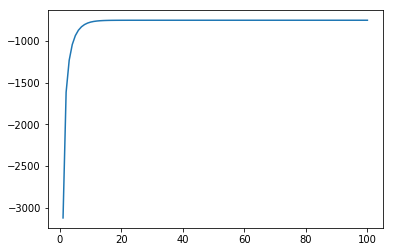

Test set accuracy: [[ 0.91397849]]


In [20]:
X_train = read_file('X_train.csv')
X_test = read_file('X_test.csv')
Y_train = read_file('y_train.csv')
Y_test = read_file('y_test.csv')

X_train2 = X_train.copy()
X_test2 = X_test.copy()
Y_train2 = Y_train.copy()
Y_test2 = Y_test.copy()

    # standardize data:  NOT ALLOWED!!
    # for i in range(54,57):
    #     xmean = np.mean(X_train2[:,i])
    #     xstd = np.std(X_train2[:,i])
    #     X_train2[:,i] = (X_train2[:,i]-xmean)/xstd
    #     X_test2[:,i] = (X_test2[:,i]-xmean)/xstd

    # Add a column of 1s to the data:
X_train2 = np.column_stack((X_train2, np.ones(X_train2.shape[0])))
X_test2 = np.column_stack((X_test2, np.ones(X_test2.shape[0])))

    # make 0 to -1:
Y_train2[Y_train2 == 0] = -1
Y_test2[Y_test2 == 0] = -1

    # initialize weights:
weights = np.zeros(X_train2.shape[1]).reshape(-1, 1)

    # define a sigmoit function:
def sigmoid(x):
    print(x)
    return 1 / (1 + np.exp(-x))



iterations = 100
objective = []
for t in range(1, iterations + 1):
    eta = 1 / np.sqrt(t + 1)

    sigm_i = expit(np.multiply(Y_train2, X_train2.dot(weights)))
            # print(sigm_i.shape)

            # objective for previous iteration:
    objective.append(np.sum(np.log(sigm_i + 1e-10)))

            # determine the second order gradient:
            # second_grad = -np.multiply(
            #                     np.multiply(sigm_i,1-sigm_i),
            #                     X_train2.dot(X_train2.T)
            #                     )
    second_grad = -np.multiply(
                np.multiply(sigm_i, 1 - sigm_i),
                X_train2).T.dot(X_train2)
            # print(second_grad)
            # determine the constant for each i
    first_grad = X_train2.T.dot(np.multiply(Y_train2, 1 - sigm_i))
            # print(update.shape)

    weights -= eta * np.linalg.inv(second_grad).dot(first_grad)

# figtitle = 'Logistic Regression (Newton Method)'
# figsave = 'hw2_newton.png'

print(objective)

x = list(range(1,101))

plt.plot(x, objective)
plt.show()

predict_test = np.sign(X_test2.dot(weights))
accuracy = sum(predict_test == Y_test2) / len(predict_test)
print("Test set accuracy:", accuracy)


    # print(objective[:10])
    # plt.figure()
    # plt.plot(range(1,iterations+1),objective)
    # plt.xlabel('iterations')
    # plt.ylabel('objective function')
    # plt.title(figtitle)
    # plt.savefig(figsave)
    # plt.show()


# def main():
#     args = sys.argv



    # test on subsets:
    # X_train = X_train[,:]
    # Y_train = Y_train[:100]

    # call naive bayes
#    if 'naive' in args:
    #naive_bayes(X_train, Y_train, X_test, Y_test)

    # KNN:
    #if 'knn' in args:
    # KNN(X_train, Y_train, X_test, Y_test)

    # logistic:
    # if 'logreg1' in args:
 

In [49]:
a = np.matrix('2 2;2 2')
b = np.matrix('1 2; 3 4')

print(np.multiply(a,b))
# print(a *b)

[[2 4]
 [6 8]]


In [4]:
import numpy as np

a = [1,2,3,4,5]
b = [1,2,3,4,5]

c = [a[i]*b[i] for i in range(len(a))]
# print(a[i]*b[i] from i)
print(c)
d = np.sum(c)
print(d)

[1, 4, 9, 16, 25]
55


In [7]:
a = [[1],[2],[3],[4]]
b = [[1],[2],[3],[4]]
print(np.sum(a==b))

1


In [11]:
b = np.array([[8,1,7], [4,3,9], [5,2,6]])
print(np.apply_along_axis(sorted, 1, b))
print(np.apply_along_axis(sorted, 0, b))

[[1 7 8]
 [3 4 9]
 [2 5 6]]
[[4 1 6]
 [5 2 7]
 [8 3 9]]


In [15]:
def mul2(list):
    list**2;
    
a = [[1,2,3,4],[5,6,7,8]]
b = np.array(a)
print(b**2)

[[ 1  4  9 16]
 [25 36 49 64]]
